In [2]:
import pandas as pd
import csv

act_train = pd.read_csv('./data/act_train.csv')
ppl = pd.read_csv('./data/people.csv', parse_dates=['date'])

# date column에서 int 형식만 남기는 작업, plot을 그리기 편하게 하기 위해서.
def datetime_str_converter(data):
    
    datetime = list(data['date'])
    year_list, month_list, day_list = [], [], []
    for item in datetime:
        year_list.append(item[:4])
        month_list.append(item[5:7])
        day_list.append(item[8:10])

    return year_list, month_list, day_list

# act_train dataset에 함수 적용
year_list, month_list, day_list = datetime_str_converter(act_train)
date_list = []
for year, month, day in zip(year_list, month_list, day_list):
    date_list.append(int(year + month + day))
    
act_train['act_date'] = date_list
del act_train['date']

In [4]:
# Fill Nan. Because if dataset has NaN values, API can't make plots.
act_char_10 = act_train['char_10']
act_char_10 = act_char_10.fillna('type0')

del act_train['char_10']

act_train_re = pd.concat([act_train, act_char_10], axis=1)

act_train_nan = act_train_re.dropna()

act_train_nan.nunique()

people_id             75986
activity_id          157615
activity_category         1
char_1                   51
char_2                   32
char_3                   11
char_4                    7
char_5                    7
char_6                    5
char_7                    8
char_8                   18
char_9                   19
outcome                   2
act_date                411
char_10                   1
dtype: int64

In [7]:
ppl.keys()

Index(['people_id', 'char_1', 'group_1', 'char_2', 'date', 'char_3', 'char_4',
       'char_5', 'char_6', 'char_7', 'char_8', 'char_9', 'char_10', 'char_11',
       'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17',
       'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23',
       'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29',
       'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35',
       'char_36', 'char_37', 'char_38'],
      dtype='object')

In [ ]:
sns.countplot(x = 'char_1', hue = 'outcome', data = df_train_nan)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_train_nan.keys()

Index(['people_id', 'activity_id', 'activity_category', 'char_1', 'char_2',
       'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9',
       'outcome', 'act_date', 'char_10'],
      dtype='object')

In [ ]:
# for i in df_train_nan.keys():
#     sns.countplot(x = i, hue = 'outcome', data = df_train_nan)
#     print('plot about {} has calculated!'.format(i))
# plt.show()

plot about people_id has calculated!


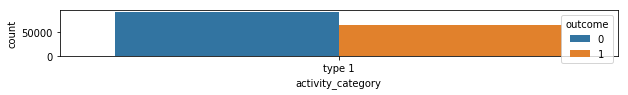

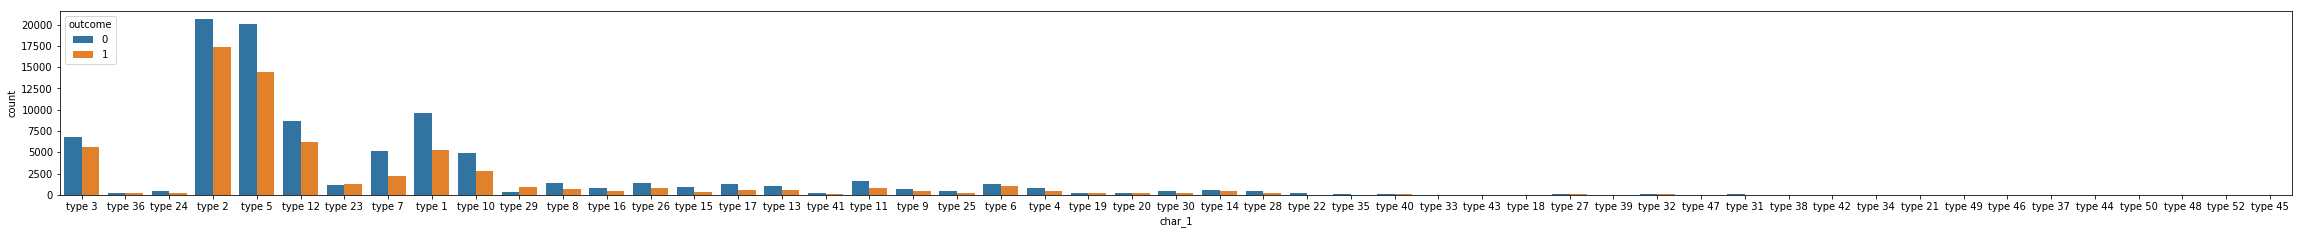

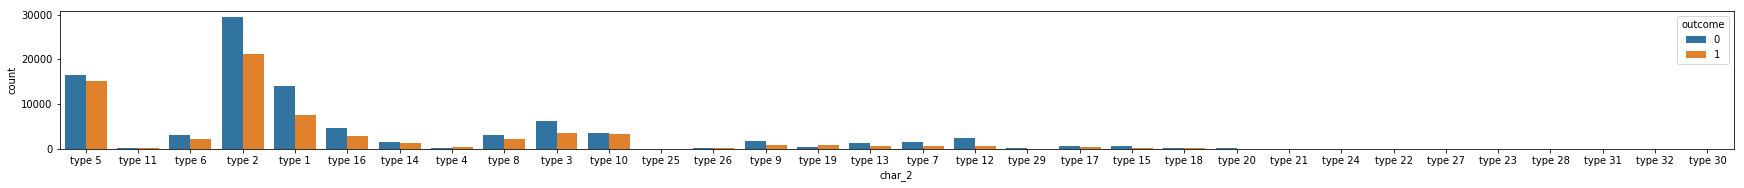

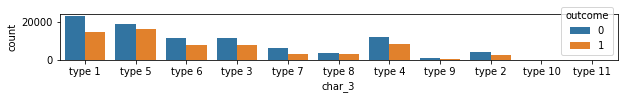

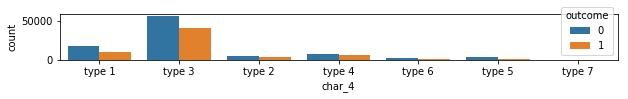

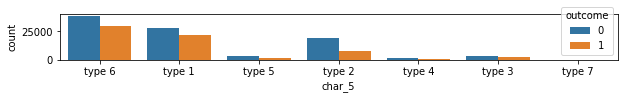

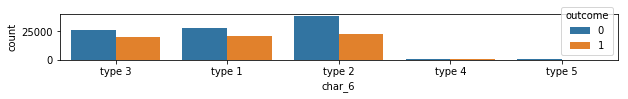

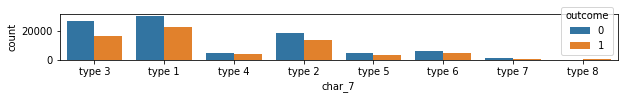

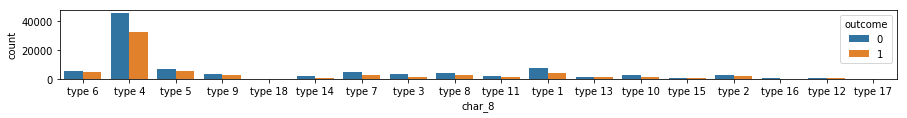

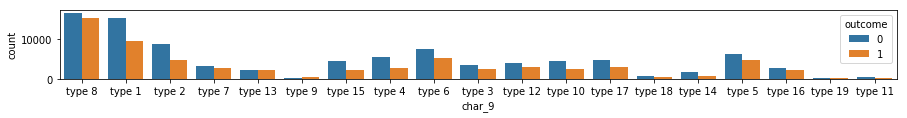

In [4]:
plt.figure(figsize=(10,10)).add_subplot(10,1,2)
sns.countplot(x = 'activity_category', hue = 'outcome', data = df_train_nan)

plt.figure(figsize=(40,40)).add_subplot(10,1,2)
sns.countplot(x = 'char_1', hue = 'outcome', data = df_train_nan)

plt.figure(figsize=(30,30)).add_subplot(10,1,1)
sns.countplot(x = 'char_2', hue = 'outcome', data = df_train_nan)

plt.figure(figsize=(10,10)).add_subplot(10,1,1)
sns.countplot(x = 'char_3', hue = 'outcome', data = df_train_nan)

plt.figure(figsize=(10,10)).add_subplot(10,1,1)
sns.countplot(x = 'char_4', hue = 'outcome', data = df_train_nan)

plt.figure(figsize=(10,10)).add_subplot(10,1,1)
sns.countplot(x = 'char_5', hue = 'outcome', data = df_train_nan)

plt.figure(figsize=(10,10)).add_subplot(10,1,1)
sns.countplot(x = 'char_6', hue = 'outcome', data = df_train_nan)

plt.figure(figsize=(10,10)).add_subplot(10,1,1)
sns.countplot(x = 'char_7', hue = 'outcome', data = df_train_nan)

plt.figure(figsize=(15,15)).add_subplot(10,1,1)
sns.countplot(x = 'char_8', hue = 'outcome', data = df_train_nan)

plt.figure(figsize=(15,15)).add_subplot(10,1,1)
sns.countplot(x = 'char_9', hue = 'outcome', data = df_train_nan)

plt.show()

### 카운트플롯의 형태를 보면, activity_category 의 type1의 outcome value의 분포와 char1~9 의 그것에 유의미한 차이를 보여주는 column이 존재하지 않는다. 

### 이 feature 들이 분석결과에 유의미한 영향을 행사하는지 확인할 필요 있음.